# Create Forecasting Model

## 1. Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd               # for dataframe
import numpy as np                # for mathematical calculation
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for plotting

df = pd.read_excel('/content/drive/MyDrive/Pacmann Academy/Supply Chain Analytics/Demand Forecasting/Forecasting Dataset.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


## 2. Check the column information

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
#Change Order Date Column Type to Date

df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

## 3. Find the column missing value

In [6]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Since there's no missing value in the dataset, we can proceed to the next step

## 4. Data Preprocessing

In [7]:
monthly_agg = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'sum'}).reset_index()
monthly_agg.head()

/tmp/ipython-input-17764237.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum', 'Profit': 'sum', 'Discount': 'sum'}).reset_index()


,Order Date,Sales,Profit,Discount
0,2014-01-31,12106.270,1169.0875,5.00
1,2014-02-28,1739.330,22.0197,2.00
2,2014-03-31,14412.058,-1524.5706,8.10
3,2014-04-30,6827.180,159.9020,2.90
4,2014-05-31,5856.862,284.9670,5.25


## 5. Create Sales Forecast Model

### 5a. Seasonal Naive Bayes

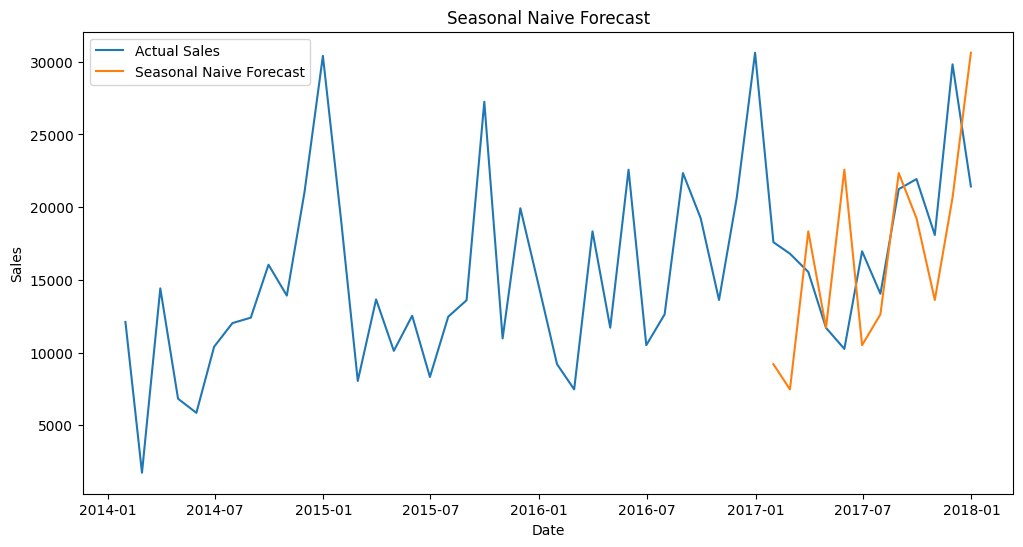

,Model,RMSE,MAE
0,Seasonal Naive Bayes,6816.422289,5611.453617


In [8]:
monthly_agg['Seasonal Naive Forecast'] = monthly_agg['Sales'].shift(12)

test_set = monthly_agg.iloc[-12:]
train_set = monthly_agg.iloc[:-12]

plt.figure(figsize=(12, 6))
plt.plot(monthly_agg['Order Date'], monthly_agg['Sales'], label='Actual Sales')
plt.plot(test_set['Order Date'], test_set['Seasonal Naive Forecast'], label='Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Seasonal Naive Forecast')
plt.legend()
plt.show()
plt

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(test_set['Sales'], test_set['Seasonal Naive Forecast']))
mae = mean_absolute_error(test_set['Sales'], test_set['Seasonal Naive Forecast'])

model_evaluation = pd.DataFrame({'Model': ['Seasonal Naive Bayes'], 'RMSE': [rmse], 'MAE': [mae]})
model_evaluation

### 5b. ARIMA

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Model,RMSE,MAE
0,Seasonal Naive Bayes,6816.422289,5611.453617
1,ARIMA,8082.740681,7376.730231


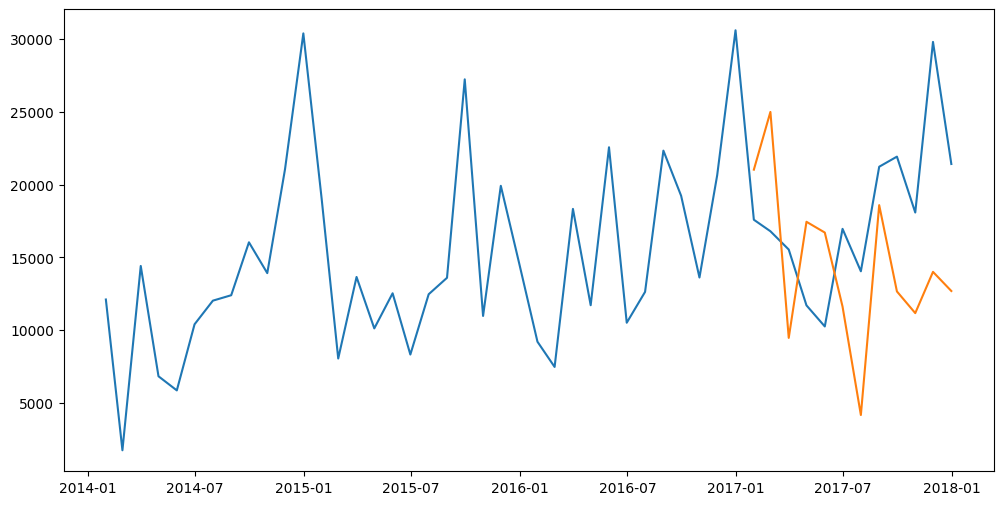

In [9]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_set['Sales'], order=(13, 0, 5)) #(p,d,q)
arima_model_fit = arima_model.fit()

arima_forecast = arima_model_fit.forecast(steps=len(test_set))
arima_forecast.head()

plt.figure(figsize=(12, 6))
plt.plot(monthly_agg['Order Date'], monthly_agg['Sales'], label='Actual Sales')
plt.plot(test_set['Order Date'], arima_forecast, label='ARIMA Forecast')

rmse = np.sqrt(mean_squared_error(test_set['Sales'], arima_forecast))
mae = mean_absolute_error(test_set['Sales'], arima_forecast)

# Check if 'ARIMA' already exists in model_evaluation
if 'ARIMA' in model_evaluation['Model'].values:
    # Find the index of the existing ARIMA row
    arima_index = model_evaluation.index[model_evaluation['Model'] == 'ARIMA'][0]
    # Update the existing row with the new values
    model_evaluation.loc[arima_index, ['RMSE', 'MAE']] = [rmse, mae]
else:
    # Append the new ARIMA results if not already present
    new_row = pd.DataFrame({'Model': ['ARIMA'], 'RMSE': [rmse], 'MAE': [mae]})
    model_evaluation = pd.concat([model_evaluation, new_row], ignore_index=True)

model_evaluation.head()

### 5c. SARIMAX

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


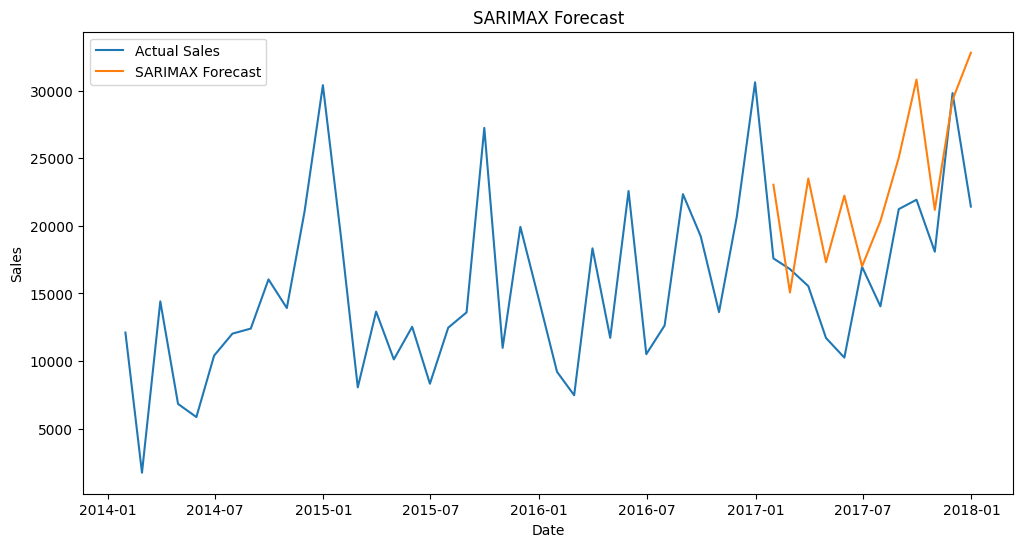

,Model,RMSE,MAE
0,Seasonal Naive Bayes,6816.422289,5611.453617
1,ARIMA,8082.740681,7376.730231
2,SARIMAX,6731.074253,5561.723615


In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_set and test_set are defined as in the previous code

# Fit the SARIMAX model
sarima_model = SARIMAX(train_set['Sales'], order=(3, 1, 2), seasonal_order=(5, 1, 1, 12)) #SARIMAX = (Seasonal) Autoregressive Integrated Moving Average (with Exogenous Variable)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_model_fit.predict(start=len(train_set),end=len(monthly_agg)-1)
sarima_forecast.head()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_agg['Order Date'], monthly_agg['Sales'], label='Actual Sales')
plt.plot(test_set['Order Date'], sarima_forecast, label='SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_set['Sales'], sarima_forecast))
mae = mean_absolute_error(test_set['Sales'], sarima_forecast)

# Check if 'SARIMAX' already exists in model_evaluation
if 'SARIMAX' in model_evaluation['Model'].values:
    # Find the index of the existing SARIMAX row
    sarima_index = model_evaluation.index[model_evaluation['Model'] == 'SARIMAX'][0]
    # Update the existing row with the new values
    model_evaluation.loc[sarima_index, ['RMSE', 'MAE']] = [rmse, mae]
else:
    # Append the new SARIMAX results if not already present
    new_row = pd.DataFrame({'Model': ['SARIMAX'], 'RMSE': [rmse], 'MAE': [mae]})
    model_evaluation = pd.concat([model_evaluation, new_row], ignore_index=True)

model_evaluation.head()

## Create Prediction for 2018

Disclaimer:
The model that we picked should be seasonal naive bayes --> the error (RMSE/MAE) is smallest.

For learning purposes, SARIMAX is used to predict 2018

In [11]:
#Recall
monthly_agg.head(50)

,Order Date,Sales,Profit,Discount,Seasonal Naive Forecast
0,2014-01-31,12106.2700,1169.0875,5.00,NaN
1,2014-02-28,1739.3300,22.0197,2.00,NaN
2,2014-03-31,14412.0580,-1524.5706,8.10,NaN
3,2014-04-30,6827.1800,159.9020,2.90,NaN
4,2014-05-31,5856.8620,284.9670,5.25,NaN
5,2014-06-30,10401.0066,294.3530,5.62,NaN
6,2014-07-31,12026.5700,554.9546,7.40,NaN
7,2014-08-31,12400.0945,836.1726,4.35,NaN
8,2014-09-30,16038.8908,1079.9783,7.27,NaN
9,2014-10-31,13919.1210,553.1593,4.65,NaN


In [12]:
future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')
len(monthly_agg) + len(future_dates)-1

/tmp/ipython-input-527284827.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')


59

/tmp/ipython-input-4235053048.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


   Order Date  Sales Forecast
48 2018-01-31    19150.770447
49 2018-02-28    14739.381190
50 2018-03-31    22145.452819
51 2018-04-30    16471.853834
52 2018-05-31    20974.628601
53 2018-06-30    17830.149494
54 2018-07-31    18828.619348
55 2018-08-31    24919.121123
56 2018-09-30    26314.726227
57 2018-10-31    20359.035134
58 2018-11-30    28811.774110
59 2018-12-31    31175.507719


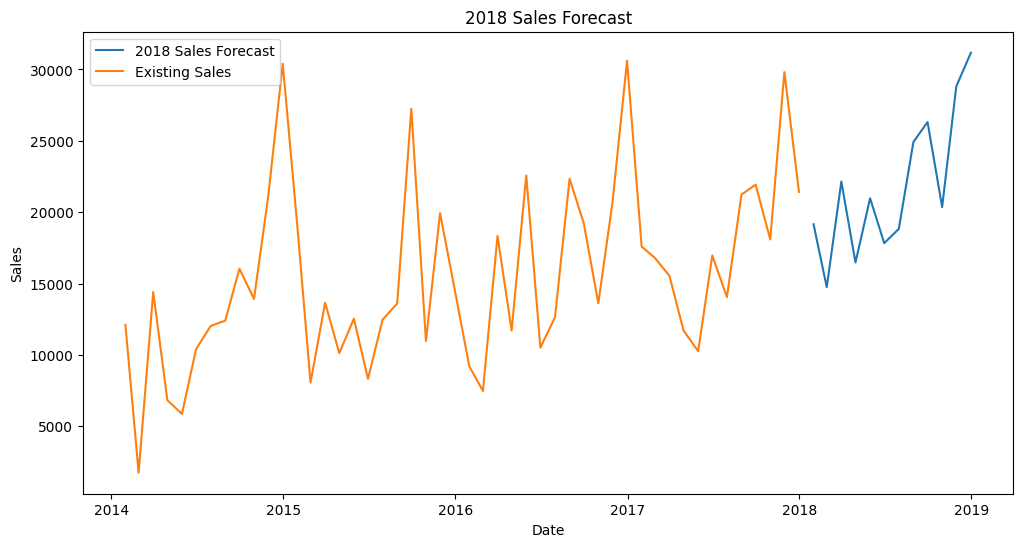

In [13]:
# Create future dates for 2018
future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')

# Make predictions for 2018
sarima_model = SARIMAX(monthly_agg['Sales'], order=(3, 1, 2), seasonal_order=(5, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_2018_forecast = sarima_model_fit.predict(start=len(monthly_agg), end=len(monthly_agg) + len(future_dates)-1)

# Create a DataFrame for the 2018 predictions
predictions_2018 = pd.DataFrame({'Order Date': future_dates, 'Sales Forecast': sarima_2018_forecast})

# Print or visualize the predictions
print(predictions_2018)

plt.figure(figsize=(12, 6))
plt.plot(predictions_2018['Order Date'], predictions_2018['Sales Forecast'], label='2018 Sales Forecast')
plt.plot(monthly_agg['Order Date'],monthly_agg['Sales'],label='Existing Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('2018 Sales Forecast')
plt.legend()
plt.show()

### Forecast per Region

In [14]:
#Redefine our data --> consist of specific region
monthly_agg_region = df[df['Region']== 'Central'].groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()
monthly_agg_region.head()

/tmp/ipython-input-1513499551.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg_region = df[df['Region']== 'Central'].groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()


,Order Date,Sales
0,2014-01-31,7349.815
1,2014-02-28,143.800
2,2014-03-31,2554.462
3,2014-04-30,1468.218
4,2014-05-31,1479.750


/tmp/ipython-input-373736624.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   Order Date  Sales Forecast
48 2018-01-31     7013.428677
49 2018-02-28     3241.692643
50 2018-03-31     4518.838180
51 2018-04-30     3745.335000
52 2018-05-31     4567.760928
53 2018-06-30     3822.526283
54 2018-07-31     5520.347557
55 2018-08-31     5262.034425
56 2018-09-30     4254.937316
57 2018-10-31     3803.068643
58 2018-11-30     5815.495184
59 2018-12-31     3998.689191


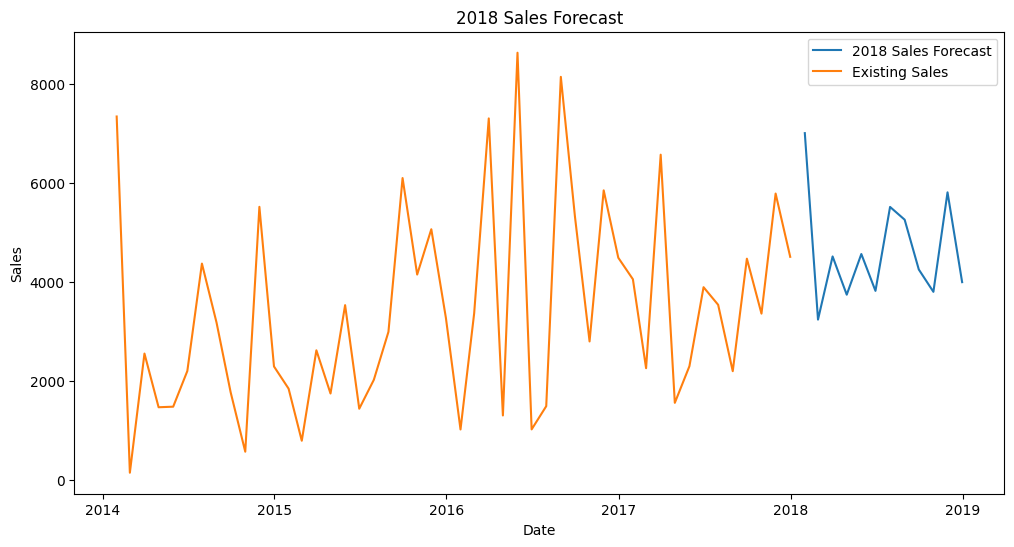

In [15]:
# Assume that the model is applicable for region too --> should be checked first

# Create future dates for 2018
future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')

# Make predictions for 2018
sarima_model = SARIMAX(monthly_agg_region['Sales'], order=(3, 1, 2), seasonal_order=(5, 1, 1, 12)) # Disclaimer : Assume that we can use equal parameter and it's the best for region prediction. We should do model evaluation first
sarima_model_fit = sarima_model.fit()
sarima_2018_forecast = sarima_model_fit.predict(start=len(monthly_agg_region), end=len(monthly_agg_region) + len(future_dates)-1)

# Create a DataFrame for the 2018 predictions
predictions_2018 = pd.DataFrame({'Order Date': future_dates, 'Sales Forecast': sarima_2018_forecast})

# Print or visualize the predictions
print(predictions_2018)

plt.figure(figsize=(12, 6))
plt.plot(predictions_2018['Order Date'], predictions_2018['Sales Forecast'], label='2018 Sales Forecast')
plt.plot(monthly_agg_region['Order Date'],monthly_agg_region['Sales'],label='Existing Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('2018 Sales Forecast')
plt.legend()
plt.show()

### Forecast per Sub-category

/tmp/ipython-input-1753210248.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg_region = df[df['Sub-Category']== sub_category_picker].groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()
/tmp/ipython-input-1753210248.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate 

   Order Date  Sales Forecast
48 2018-01-31     3303.510885
49 2018-02-28     2108.489876
50 2018-03-31     3114.377468
51 2018-04-30     4326.682706
52 2018-05-31     2693.903972
53 2018-06-30     4048.969630
54 2018-07-31     2760.361682
55 2018-08-31     2981.875153
56 2018-09-30     3394.321563
57 2018-10-31     2592.384993
58 2018-11-30     3564.272191
59 2018-12-31     4014.514469


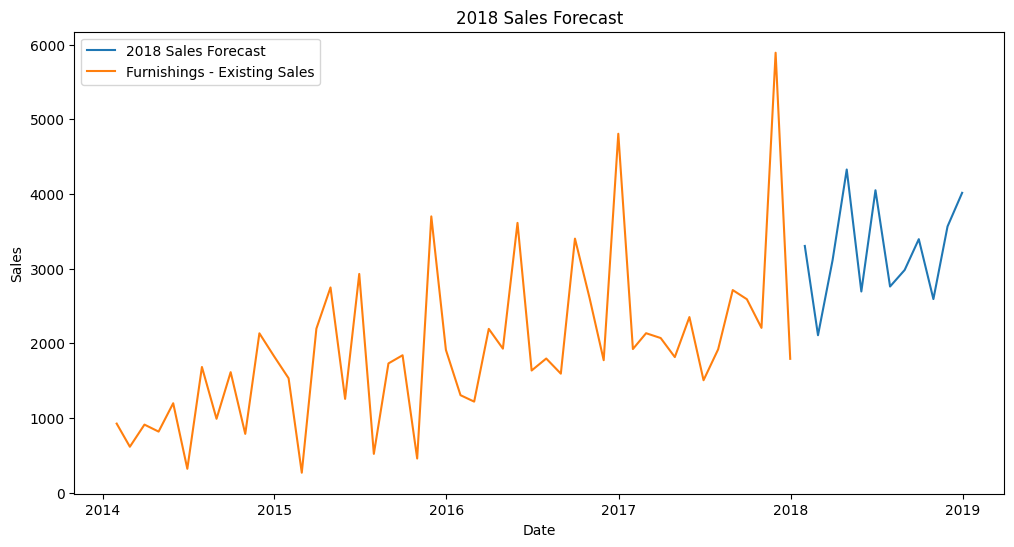

In [16]:
#Redefine our data --> consist of specific sub-category

sub_category_picker = 'Furnishings'

monthly_agg_region = df[df['Sub-Category']== sub_category_picker].groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()
monthly_agg_region.head()

# Assume that the model is applicable for region too --> should be checked first

# Create future dates for 2018
future_dates = pd.date_range(start='2018-01-01', end='2018-12-31', freq='M')

# Make predictions for 2018
sarima_model = SARIMAX(monthly_agg_region['Sales'], order=(3, 1, 2), seasonal_order=(5, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_2018_forecast = sarima_model_fit.predict(start=len(monthly_agg_region), end=len(monthly_agg_region) + len(future_dates)-1)

# Create a DataFrame for the 2018 predictions
predictions_2018 = pd.DataFrame({'Order Date': future_dates, 'Sales Forecast': sarima_2018_forecast})

# Print or visualize the predictions
print(predictions_2018)

plt.figure(figsize=(12, 6))
plt.plot(predictions_2018['Order Date'], predictions_2018['Sales Forecast'], label='2018 Sales Forecast')
plt.plot(monthly_agg_region['Order Date'],monthly_agg_region['Sales'],label=sub_category_picker + ' - Existing Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('2018 Sales Forecast')
plt.legend()
plt.show()